In [3]:
# library to import .mat file
import scipy.io as sio
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import ks_2samp
from matplotlib.patches import Rectangle
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# importing the coverage data
fc_data = sio.loadmat('../BuildCancerModels/coverage_core/coverage_fastcore.mat')
sp_data = sio.loadmat('../BuildCancerModels/coverage_core/coverage_sprintcore.mat')
sw_data = sio.loadmat('../BuildCancerModels/coverage_core/coverage_swiftcore.mat')

fc_data = fc_data['coverage_fastcore'].squeeze()
sp_data = sp_data['coverage_sprintcore'].squeeze()
sw_data = sw_data['coverage_swiftcore'].squeeze()

In [5]:
# creating a dataframe for the coverage data
coverage_df = pd.DataFrame(columns=['cellLine', 'coverage','mem'])
coverage_df = pd.concat([coverage_df, pd.DataFrame({'cellLine': range(len(sp_data)), 'coverage': sp_data, 'mem': ['Sprintcore']*len(sp_data)})], ignore_index=True)
coverage_df = pd.concat([coverage_df, pd.DataFrame({'cellLine': range(len(fc_data)), 'coverage': fc_data, 'mem': ['Fastcore']*len(fc_data)})], ignore_index=True)
coverage_df = pd.concat([coverage_df, pd.DataFrame({'cellLine': range(len(sw_data)), 'coverage': sw_data, 'mem': ['Swiftcore']*len(sw_data)})], ignore_index=True)
coverage_df.head()

,cellLine,coverage,mem
0,0,0.748148,Sprintcore
1,1,0.570370,Sprintcore
2,2,0.777778,Sprintcore
3,3,0.770370,Sprintcore
4,4,0.770370,Sprintcore


In [6]:
def plot_violin(df,ax):
    pal={'Fastcore':'#008080','Sprintcore':'#80c080','Swiftcore':'#004080'}
    sns.violinplot(y='coverage',hue='mem',split=True,gap=0.3,data=df,ax=ax,inner="quart",palette=pal)
    
    # making the spines off
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_ylabel('Fractional coverage of known cancer core reactions',fontsize=20,fontweight='bold')
    # setting the ylim 
    ax.set_ylim(0,1)
     # making the ticlabels bold
    ax.set_yticks([round(i,1) for i in np.arange(0,1.2,0.2)])
    ax.set_yticklabels([round(i,1) for i in np.arange(0,1.2,0.2)],fontweight='bold',fontsize=20)
    

In [ ]:
def plot_line_scatter(df,ax,mem1,mem2):
    mems = [mem1, mem2]
    pal={'Fastcore':'#008080','Sprintcore':'#80c080','Swiftcore':'#004080'}
    count_of_greater = {mem: 0 for mem in mems}
    # making a slope plot
    for m in range(len(fc_data)):
        df2 = df[df['cellLine']==m]
        ax.scatter([-0.06],df2[df2['mem']==mems[0]]['coverage'],color=pal[mems[0]],s=20)
        ax.scatter([0.06],df2[df2['mem']==mems[1]]['coverage'],color=pal[mems[1]],s=20)
        ax.plot([-0.06,0.06],df2['coverage'],'-',color='k',linewidth=0.5)
        if df2[df2['mem']==mems[0]]['coverage'].values[0]>df2[df2['mem']==mems[1]]['coverage'].values[0]:
            count_of_greater[mems[0]]+=1
        else:
            count_of_greater[mems[1]]+=1
    # adding the text
    ax.text(0.37,0.965,str(count_of_greater[mem1]),transform=ax.transAxes,fontsize=20,fontweight='bold',color = 'green')
    ax.text(0.58,0.965,str(count_of_greater[mem2]),transform=ax.transAxes,fontsize=20,fontweight='bold',color = 'green')

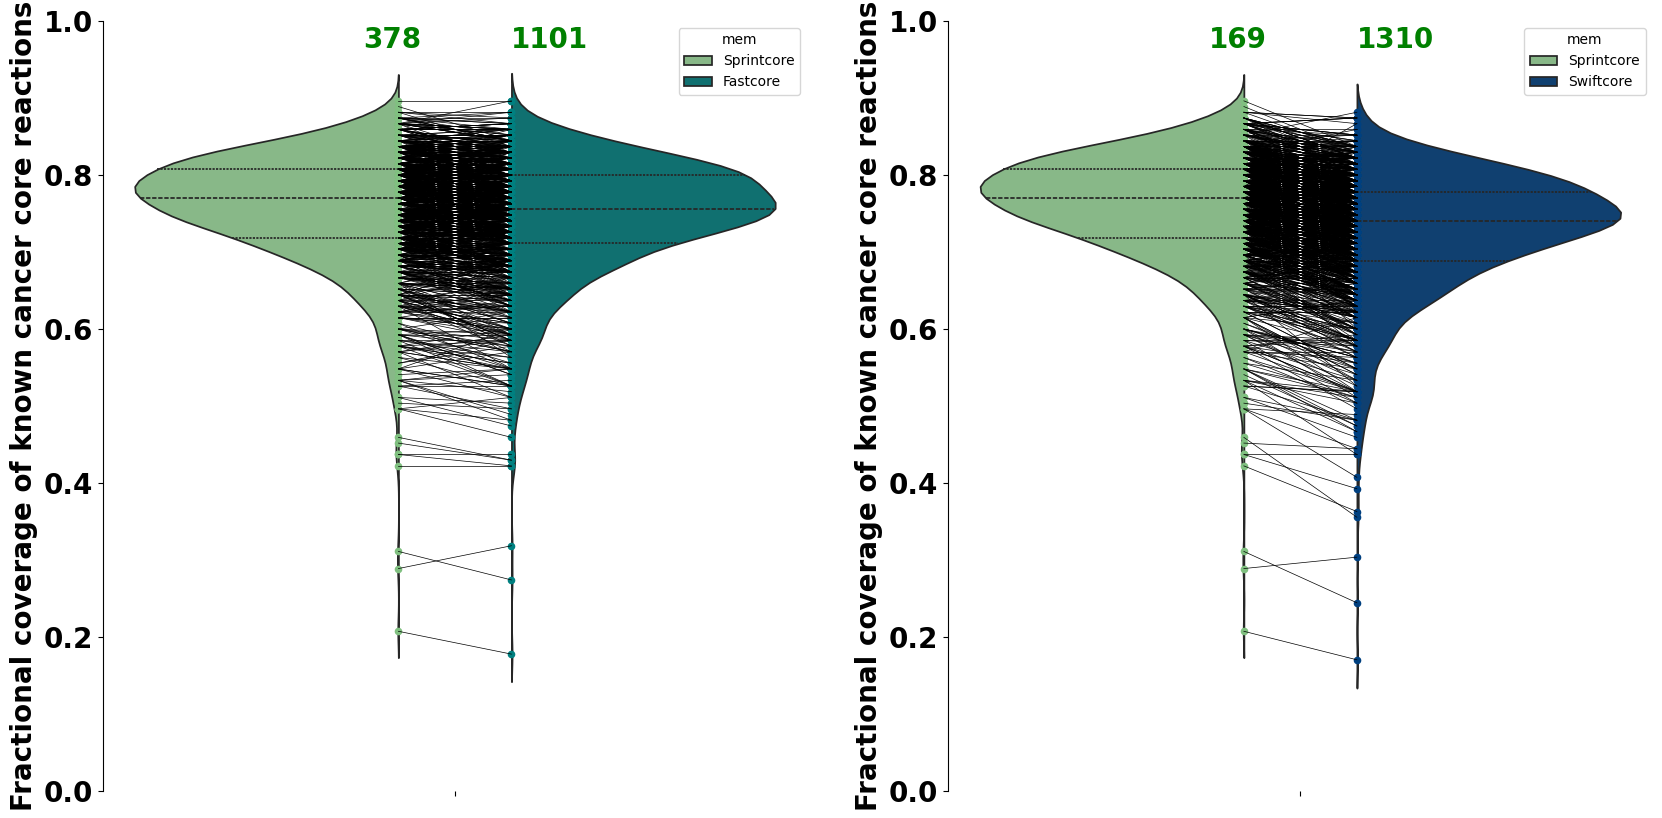

In [8]:
# plotting box plot based on the size of the models
fig,ax = plt.subplots(1,2,figsize=(20,10))
ax = ax.flatten()
models = range(len(fc_data))

yticks = np.arange(0,1,0.2)
df1 = coverage_df[coverage_df['mem']!='Swiftcore'].copy()
df2 = coverage_df[coverage_df['mem']!='Fastcore'].copy()
plot_violin(df1,ax[0])
plot_violin(df2,ax[1])
plot_line_scatter(df1,ax[0],'Sprintcore','Fastcore')
plot_line_scatter(df2,ax[1],'Sprintcore','Swiftcore')